**E-commerce — Анализ товарного ассортимента**

**Описание проекта**

Задача: проанализировать ассортимент товаров.


**Описание данных**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.


**Оглавление:**


[Шаг 1. Загрузка данных](#step_1)


[Шаг 2. Исследовательский анализ данных (EDA)](#step_2)


[Шаг 3. Категоризация товаров](#step_3)


[Шаг №4. Анализ торгового ассортимента по категориям товаров](#step_4)
   
   
  - [Шаг №4.1 Растения](#step_4_1)   
  - [Шаг №4.2. Интерьер](#step_4_2)   
  - [Шаг №4.3. Хоз. товары](#step_4_3)   
  - [Шаг №4.4. Посуда](#step_4_4)   
  - [Шаг №4.5. Сумки](#step_4_5)

[Шаг 5. Проверка гипотез](#step_5)


[Шаг 5. Общий вывод](#step_5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from scipy import stats as st

In [3]:
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

<a id='step_1'></a>
**Шаг №1. Загрузим данные**

In [5]:
data = pd.read_csv('ecommerce_dataset.csv') 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [7]:
data.sample(5)

,date,customer_id,order_id,product,quantity,price
293,2018101717,5aec7c17-5022-48ea-be49-4145ba45e5c6,68676,"Чехол для платья из нетканного материала 60*135 см белый, Hausmann, 2B-360135",1,188.0
2866,2019041520,25c0bea0-5760-4269-8f37-4ee903d3f8e1,71159,Гардения d-9 см,1,59.0
1793,2019021120,cbb1c6ab-1223-438f-af51-bfbc6c833996,70216,Искусственный цветок Ландыш пластиковый малый белый,3,22.0
2812,2019041219,41117d9d-94f7-4145-a8c9-cb6675ce7674,71125,Цветок искусственный Крокус 20 см,1,22.0
255,2018101507,9f69c05a-d4e0-4439-a182-b4322e77ab99,68649,Сумка-тележка хозяйственная Gimi Market синяя,1,1874.0


In [8]:
# пустых значений нет, посмотрим на дубликаты
data.duplicated().sum()

0

In [9]:
# добавим за все кол-во товаров
data['total_price'] = data['price'] * data['quantity']

In [10]:
# приведем значение даты к типу datetime и посмотрим, за какой период у нас данные
data['date_time'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
print('Данные по заказам за период {:%d-%m-%Y} - {:%d-%m-%Y}'.format(data['date_time'].min(), data['date_time'].max()))

Данные по заказам за период 01-10-2018 - 31-10-2019


In [11]:
# так как данные за большой период, добавим год-месяц, год-месяц-день, день недели и час для последуюго анализа
data['year'] = data['date_time'].dt.to_period('M')
data['day'] = data['date_time'].dt.date
data['month'] = data['date_time'].dt.month
data['weekday'] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour

In [12]:
# посмотрим на номера заказов и их количество 
data.order_id.describe()

count     6737.000000
mean     43128.948345
std      27899.414662
min      12624.000000
25%      14827.000000
50%      68503.000000
75%      70504.000000
max      73164.000000
Name: order_id, dtype: float64

In [13]:
print('Всего было сделано {} заказов {} уникальными пользователями'.format(len(data.order_id.unique()), len(data.customer_id.unique())))

Всего было сделано 2784 заказов 2451 уникальными пользователями


In [14]:
data.groupby('year')['order_id'].agg(['max', 'min'])

,max,min
year,,
2018-10,68814,13547
2018-11,69160,13547
2018-12,69681,14514
2019-01,70048,14521
2019-02,70521,14529
2019-03,70939,14552
2019-04,71331,14606
2019-05,71566,14715
2019-06,71834,12624


In [15]:
# посмотрим на распределение номеров заказов
data.query('month == 5').order_id.unique()

array([70903, 71333, 71335, 71336, 71054, 71341, 14715, 14716, 71344,
       71345, 71347, 71349, 71351, 71352, 14719, 71353, 14721, 71354,
       14722, 71148, 70960, 71362, 71363, 71364, 71365, 14729, 71368,
       71370, 71375, 71378, 14734, 14735, 14736, 14737, 71385, 70946,
       14740, 14741, 71388, 71389, 14742, 14744, 14745, 14747, 71390,
       71391, 71392, 71393, 71396, 71397, 14750, 71398, 71399, 14751,
       71400, 14752, 14753, 14754, 14755, 14756, 14758, 14759, 14761,
       71409, 14763, 71411, 71412, 71413, 14764, 14765, 71414, 14766,
       71415, 71417, 14769, 14770, 71419, 14771, 71319, 71422, 14774,
       71426, 14776, 14777, 71428, 14778, 71432, 71440, 71441, 14780,
       14781, 14782, 71450, 14783, 14784, 14786, 71454, 71456, 71457,
       14789, 71458, 14791, 14792, 71460, 14793, 14794, 14795, 71461,
       14796, 71463, 71462, 71466, 71467, 71469, 71470, 14798, 14799,
       71478, 71479, 71480, 14800, 14803, 14804, 14805, 14808, 71484,
       14809, 71491,

In [16]:
data.query('month == 5 and order_id >= 50000')['price'].sum()

153564.0

In [17]:
data.query('month == 5 and order_id < 50000')['price'].sum()

77683.0

По номерам заказов похоже, что нумерация зависит от устройства пользователя, к примеру, моб. приложение или браузер.

In [18]:
# сгуппируем данные по дате, customer_id, order_id и посмотрим как часть один и тотже заказ встречается
data_orders = data.groupby(['date', 'customer_id', 'order_id'])['price'].sum().to_frame().reset_index()
data_orders['order_id'].value_counts() 

14833    74
70960    60
69162    23
71148    16
69531    12
         ..
14912     1
70207     1
14910     1
70205     1
69632     1
Name: order_id, Length: 2784, dtype: int64

In [19]:
# один и тот же номер заказа встречается несколько раз с разными пользователя или датами. 
# это не логично, номер заказа должен определять уникальность заказа
# посмотрим на примере
data.query('order_id == 71480 or order_id == 13547')

,date,customer_id,order_id,product,quantity,price,total_price,date_time,year,day,month,weekday,hour
102,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,315.0,2018-10-05 00:00:00,2018-10,2018-10-05,10,4,0
103,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,207.0,2018-10-05 00:00:00,2018-10,2018-10-05,10,4,0
104,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по 6 шт,1,162.0,162.0,2018-10-05 00:00:00,2018-10,2018-10-05,10,4,0
376,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,315.0,2018-10-23 13:00:00,2018-10,2018-10-23,10,1,13
377,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,207.0,2018-10-23 13:00:00,2018-10,2018-10-23,10,1,13
378,2018102313,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по 6 шт,1,162.0,162.0,2018-10-23 13:00:00,2018-10,2018-10-23,10,1,13
509,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,315.0,2018-10-28 19:00:00,2018-10,2018-10-28,10,6,19
510,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,207.0,2018-10-28 19:00:00,2018-10,2018-10-28,10,6,19
511,2018102819,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по 6 шт,1,162.0,162.0,2018-10-28 19:00:00,2018-10,2018-10-28,10,6,19
588,2018110214,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,315.0,2018-11-02 14:00:00,2018-11,2018-11-02,11,4,14


In [20]:
# очень похоже на баг: складывается картина, что, к примеру, пользователь не смог оплатить или просто сохранил корзину, 
# а корзина сохраняется
# при этом это частый баг: таких строк не одна, а стоимость товара или состав корзины за время могли поменяться
# удалим такие заказы, при этом оставим последний по времени. будем считать, что купили именно последнюю корзину. 

# выделим номера таких заказов
orders_duplicates = data_orders['order_id'].value_counts().to_frame().query('order_id > 1').index

# найдем индексы строк, с таким же номером, но с меньшей датой и удалим их
for order in orders_duplicates:
    date = data.loc[data['order_id'] == order]['date'].max()
    index = data[(data['order_id'] == order) & (data['date'] != date)].index
    data = data.drop(index = index)

In [21]:
# проверим себя
data.query('order_id == 71480 or order_id == 13547')

,date,customer_id,order_id,product,quantity,price,total_price,date_time,year,day,month,weekday,hour
827,2018111616,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по 6 шт,1,315.0,315.0,2018-11-16 16:00:00,2018-11,2018-11-16,11,4,16
828,2018111616,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,207.0,2018-11-16 16:00:00,2018-11,2018-11-16,11,4,16
829,2018111616,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по 6 шт,1,162.0,162.0,2018-11-16 16:00:00,2018-11,2018-11-16,11,4,16
4026,2019052502,51f04abe-a71a-4694-87b7-ad9ef4930e51,71480,Мята перечная Шоколадная Chocolate d-7 см h-10 см укорененный черенок,1,74.0,74.0,2019-05-25 02:00:00,2019-05,2019-05-25,5,5,2


In [22]:
# напишем фунцию перевода ё в е 
def replace_e(locale):
    if locale == locale:
        if 'ё' in locale: 
            locale = locale.replace("ё", "е")
    return locale

In [23]:
# приведем названия товаров к нижнему регистру и заменим буквы 
data['product'] = data['product'].str.lower()

In [24]:
# заменим ё на е
data['product'] = data['product'].apply(replace_e)

In [25]:
data.to_csv('data_ecommerce')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 6736
Data columns (total 13 columns):
date           4781 non-null int64
customer_id    4781 non-null object
order_id       4781 non-null int64
product        4781 non-null object
quantity       4781 non-null int64
price          4781 non-null float64
total_price    4781 non-null float64
date_time      4781 non-null datetime64[ns]
year           4781 non-null period[M]
day            4781 non-null object
month          4781 non-null int64
weekday        4781 non-null int64
hour           4781 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(3), period[M](1)
memory usage: 522.9+ KB


**ВЫВОД:** 

В данных данные о чеках с разбивкой по товарам за период 01-10-2018 - 31-10-2019. Пустых значений нет, явных повторений нет. Но если рассматривать номер заказа - как индетификатор заказа, то можно предположить, что в данных баг: сохраняются корзины, а не реальные заказы. Удалили строки с одниковами номерами заказов, оставив более поздний по дате заказ. 


Привели тип данных параментра дата к datetime, добавили год-месяц, год-месяц-день, день недели, время покупки и стоимость за единицу товара для удобства последующего анализа. Привели названия товарок к нижнему регистру и заменили ё на е.

<a id='step_2'></a>
**Шаг №2. Исследовательский анализ данных**

In [27]:
#посмотрим на разброс значений для цены за ед. товара
data[['price',]].describe()

,price
count,4781.000000
mean,516.912989
std,948.426631
min,9.000000
25%,90.000000
50%,150.000000
75%,488.000000
max,14917.000000


In [28]:
# посмотрим на percentiles для общей цены и цены за ед. товара
print(np.percentile(data['price'], [90, 95, 99])) 
print(np.percentile(data['price'], [1, 5, 10])) 

[1424.  2219.  4970.4]
[15. 37. 38.]


In [29]:
# посмотрим на размах по количеству купленного товара в чеке
data['quantity'].describe()

count    4781.000000
mean        2.824723
std        17.740311
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

In [30]:
print(np.percentile(data['quantity'], [90, 95, 99])) 

[ 3.  7. 30.]


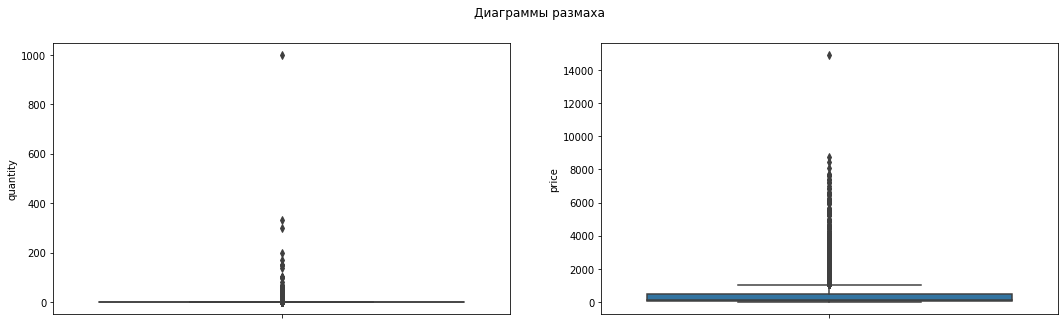

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.boxplot(y= 'quantity', data=data, ax=axes[0])
sns.boxplot(y= 'price', data=data, ax=axes[1])
    
fig.suptitle('Диаграммы размаха');

In [32]:
data.query('price < 15')['product'].value_counts()

базилик застольный 0,3 г 4660010775419                       2
томат балконное чудо 0,1 г 4660010772531                     2
базилик пурпурные звезды d-7 см                              2
базилик овощной арарат d-7 см                                2
укроп обильнолистный 3,0 г 4660010772562                     2
базилик смесь зеленого и фиолетового 0,4 г 4660010775433     2
алиссум (лобулярия) снежные одежды 0,2 г 4650091480302       2
земляника барон солемахер 0,04 г 4660010775556               1
львиный зев волшебный ковер 0,05 г 4660010779639             1
годеция рембранд 0,1 г 4650091480128                         1
космея кэнди страйп 0,3 г 4650091480272                      1
огурец засолочный 0,3 г 4660010776102                        1
базилик зеленый тонус d-7 см                                 1
настурция орхидное пламя 5 шт 4650091480692                  1
цинния коралловая красавица 0,2 г 4660010773323              1
календула бронзовая красавица 10 шт 4650091480746      

In [33]:
print("Всего уникальных товаров {}, стоимостью менее 15 у.е".format(len(data.query('price < 15')['product'].unique())))
print("Такие товары были куплены всего {} раз в период {:%d-%m-%Y} - {:%d-%m-%Y}".format(data.query('price < 15')['product'].shape[0], data.query('price < 15')['date_time'].min(), data.query('price < 15')['date_time'].max()))

Всего уникальных товаров 38, стоимостью менее 15 у.е
Такие товары были куплены всего 45 раз в период 25-11-2018 - 21-09-2019


In [34]:
data.query('price > 4200')

,date,customer_id,order_id,product,quantity,price,total_price,date_time,year,day,month,weekday,hour
98,2018100417,d1a13243-9111-454f-848c-dcce0958528c,68529,"сумка-тележка хозяйственная andersen scala shopper plus, elba, черная 133-051-80",1,5024.0,5024.0,2018-10-04 17:00:00,2018-10,2018-10-04,10,3,17
121,2018100707,f37fa8c2-24a0-451a-8306-39d397e7c4b2,68554,стремянка алюминиевая hailo 4302-301 livingstep comfort plus 2 ступенчатая алюминиевая,1,4949.0,4949.0,2018-10-07 07:00:00,2018-10,2018-10-07,10,6,7
596,2018110217,305c9634-ec53-46be-af05-48ee8bd790a5,68836,"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",1,5249.0,5249.0,2018-11-02 17:00:00,2018-11,2018-11-02,11,4,17
634,2018110502,639c4989-b0ab-412a-b7ec-be394cb2d372,68856,сумка-тележка хозяйственная rolser imx005 marengo logic dos+2 серая,1,6007.0,6007.0,2018-11-05 02:00:00,2018-11,2018-11-05,11,0,2
654,2018110522,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,сумка-тележка хозяйственная rolser mou041 malva rd6 сиреневая,1,7597.0,7597.0,2018-11-05 22:00:00,2018-11,2018-11-05,11,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,2019101109,39bded4f-7358-4fce-a313-a7cb2d3a7005,72929,сумка-тележка хозяйственная rolser imx004 negro logic rg черная,1,6075.0,6075.0,2019-10-11 09:00:00,2019-10,2019-10-11,10,4,9
6584,2019101118,61467178-1b59-4c2b-bba7-ced50d80e11f,72936,"одеяло wellness 1410 пуховое белое, 100% белый пух 500 гр, 140х200 см, 4607101064199",1,4724.0,4724.0,2019-10-11 18:00:00,2019-10,2019-10-11,10,4,18
6626,2019101611,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,72986,сумка-тележка хозяйственная rolser mnb012 azul logic rg,1,6600.0,6600.0,2019-10-16 11:00:00,2019-10,2019-10-16,10,2,11
6629,2019101615,d5584388-ffbe-42fd-a746-a98828ec919f,72992,стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов,1,7724.0,7724.0,2019-10-16 15:00:00,2019-10,2019-10-16,10,2,15


In [35]:
print("Всего уникальных товаров {}, стоимостью более 5000 у.е".format(len(data.query('price > 5000')['product'].unique())))
print("Такие товары были куплены всего {} раз в период {:%d-%m-%Y} - {:%d-%m-%Y}".format(data.query('price > 5000')['product'].shape[0], data.query('price > 5000')['date_time'].min(), data.query('price > 5000')['date_time'].max()))

Всего уникальных товаров 37, стоимостью более 5000 у.е
Такие товары были куплены всего 48 раз в период 04-10-2018 - 23-10-2019


In [36]:
print("Всего уникальных товаров {}, стоимостью более 14000 у.е".format(len(data.query('price > 14000')['product'].unique())))
print("Такие товары были куплены всего {} раз в период {:%d-%m-%Y} - {:%d-%m-%Y}".format(data.query('price > 14000')['product'].shape[0], data.query('price > 14000')['date_time'].min(), data.query('price > 14000')['date_time'].max()))

Всего уникальных товаров 1, стоимостью более 14000 у.е
Такие товары были куплены всего 1 раз в период 29-07-2019 - 29-07-2019


In [37]:
data.query('price > 14000')

,date,customer_id,order_id,product,quantity,price,total_price,date_time,year,day,month,weekday,hour
5992,2019072917,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917.0,14917.0,2019-07-29 17:00:00,2019-07,2019-07-29,7,0,17


In [38]:
print('Всего {} уникальных товаров, купленных в одном чеке более 30 позиций'.format(len(data.query('quantity > 30')['product'].unique())))
print('Такие товары были куплены {} раз'.format(data.query('quantity > 30').shape[0]))
print('При этом {} товара были стоимостью менее 15 у.е. за штуку'.format(len(data.query('quantity > 30 and price < 15')['product'].unique())))
print('Такие товары были куплены {} раз'.format(data.query('quantity > 30 and price < 15').shape[0]))

Всего 33 уникальных товаров, купленных в одном чеке более 30 позиций
Такие товары были куплены 38 раз
При этом 0 товара были стоимостью менее 15 у.е. за штуку
Такие товары были куплены 0 раз


In [39]:
# удалим из данных сушилку стоимостью 14к, товары, которые купили более 30 штук в одном чеке

data = data.drop(data.query('price > 13000').index)
data = data.drop(data.query('quantity >= 30').index)

**ВЫВОД:**

Так как стоимость за ед. товара имеет большой размах (семена могут стоить копейки, а сушилки более 5 тыс. у.е.), удалим явные выбросы: сушилку, стоимостью более 14 тыс. 

Так как в среднем товары покупаются по одной ед. товара (75% всех продаж было с 1 ед. товара), а только в 1% товар покупался в количестве 30-1000 штук за одну продажу, удалим продажи с количеством более 30 штук, так как при анализе влияния категории на общую выручку данные покупки будут искажать результаты. 

<a id='step_3'></a>
**Шаг №3. Категоризация товаров**

In [40]:
category = data['product'].apply(lambda x: x.split()[0] + ' ' + x.split()[1]).to_frame()
category.drop_duplicates().head(10)

,product
0,комнатное растение
2,радермахера d-12
3,хризолидокарпус лутесценс
4,циперус зумула
5,шеффлера лузеана
6,юкка нитчатая
7,настенная сушилка
8,таз пластмассовый
9,чехол для
10,вешалка для


In [41]:
# добавим столбес с двумя первыми словами в названии товара и выделим наиболее чаще встречающиеся
data['product_name_2w'] = data['product'].apply(lambda x: x.split()[0] + ' ' + x.split()[1])
product_names = data['product_name_2w'].unique().tolist()
m = Mystem()
string = '; '.join(product_names)
lemmas = m.lemmatize(string)
print(Counter(lemmas))

Counter({' ': 899, '; ': 878, '-': 77, 'для': 68, 'муляж': 40, 'd': 38, 'рассада': 33, ',; ': 26, 'скатерть': 23, 'набор': 21, 'петуния': 21, 'вешалка': 19, 'стремянка': 17, 'в': 15, 'коврик': 14, 'с': 13, 'алюминиевый': 12, 'пеларгония': 11, 'микс': 11, 'махровый': 11, '12': 10, '9': 10, 'сумка': 9, 'тележка': 9, 'ампельный': 9, 'салатник': 9, 'дыня': 9, 'пластмассовый': 8, 'щетка': 8, 'роза': 8, 'кружок': 8, 'огурец': 8, 'фуксия': 8, 'томат': 7, 'нож': 7, 'кухонный': 7, 'капуста': 7, 'вербена': 7, 'ложка': 6, 'хозяйственный': 6, '13': 6, 'цикламен': 6, 'хризантема': 6, 'салфетка': 6, 'фиалка': 6, 'швабра': 6, 'ведро': 6, 'насадка': 6, 'webber': 6, ' (': 6, 'косметь': 6, 'калибрахоа': 6, 'арбуз': 6, 'комнатный': 5, 'сушилка': 5, 'корзина': 5, 'клубника': 5, 'столовый': 5, 'доска': 5, 'искусственный': 5, 'перчатка': 5, 'полотенце': 5, 'металлический': 5, 'универсальный': 5, 'стакан': 5, 'мята': 5, '); ': 5, 'кастрюля': 5, 'базилик': 5, 'крупноцветковый': 5, 'х': 4, 'сметка': 4, '3': 4,

In [42]:
data['category'] = np.nan
data['tag'] = np.nan

Создадим каталог по словам: разобьем леммы по категориями, а остатки доделаем руками.

In [43]:
# создадим каталог по словам
category_dict = {
    'посуда' : ['кастрюля', 'сковорода', 'стакан', 'столовый', 'тарелка', 'хлебница', 'миска', 'таз', 'крышка', 'сахарница', 
                'вилка', 'тортница', 'салатник', 'нож', 'кувшин', 'для выпечки', 'бульонница', 'отделитель', 'подставка',
                'картофелемялка', 'блюдо', 'емкость', 'набор', 'термос', 'толкушка', 'сито', 'кондитерский', 'половник', 'форма',
                'рыбочистка', 'терка', 'венчик', 'лапчатка', 'блюдце', 'скалка', 'бидон', 'просеиватель', 'лопатка', 'кисточка',
                 'противень', 'овощечистка', 'лоток', 'ковш', 'сотейник', 'орехоколка', 'пресс', 'масленка', 'ложка', 'кружка', 
               'экран'], 
    
    'интерьер' : ['скатерть', 'вешалка', 'коврик', 'ведро', 'сушилка', 'простыня',  'штора', 'махровых', 'подкладка',
                 'покрывало', 'муляж', 'полотенце', 'салфетка', 'плед', 'ковер', 'карниз', 'постельное', 'комплект', 'стеклянная',
                 'одеяло', 'ручка', 'комод', 'салфетница', 'банка', 'монарда', 'кофр', 'наматрацник', 'наволочка', 'стеллаж', 
                 'полка', 'вешалки', 'полки', 'пододеяльник', 'простынь', 'фоторамка', 'подушка', 'композиция', 'складной', 
                 'халат', 'белье', 'полотенец', 'пуф', 'обувница-3', 'кольца', 'новогоднее', 'искусственный', 
                  'наматрасник', 'корзинка'], 
    
      'хоз. товары' : ['швабра', 'доска', 'корзина', 'стремянка', 'щетка', 'насадка', 'ерш', 'средство', 'плечики', 'этажерка',
                    'совок', 'пакет', 'термометр', 'шнур', 'стремянки', 'ящик', 'контейнер', 'крючок', 'коробка', 'прищепки', 
                    'шило', 'ополаскиватель', 'сиденье', 'корыто', 'зубная паста', 'чехол', 'перчатки', 'ключница', 'мыло', 
                    'рукав', 'антижир', 'подголовник', 'мыльница', 'штанга', 'веник', 'гель', 'антинакипин', 
                    'рассекатель', 'паста', 'мешок', 'соль', 'вантуз', 'дозатор', 'пьезозажигалка', 'губка', 
                    'ткань', 'решетка', 'окномойка', 'бензин', 'линейка', 'кондиционер', 'маска', 'салфетки', 'крем', 'отжим', 
                    'держатель', 'салфеток', ' биопорошок', 'пенна', 'урна', 'вкладыши', 'сварка', 'пробка', 
                    'вкладыши', 'ванна', 'покрытие', 'пена', 'тряпка', 'бальзам', 'фал', 'блок', 'фиксатор-шар', 
                    'сметка', 'ролик', 'сетка', 'стяжки', 'шпагат', 'концентрат', 'веревка', 'гладильная', 'складная', 
                       'гипоаллергенный', 'основание'],      
    
    'инструменты' : ['набор сверел', 'угольник', 'штангенциркуль', 'шпингалет', 'петля', 'крепеж', 'сверло', 'завертка', 
                     'стяжка', 'инструмент', 'уголок', 'скребок', 'измерительный'],
        
    'сумки' : ['сумка', 'тележка'], 

        'растения' : [ 'тюльпан', 'дыня', 'роза', 'огурец', 'фуксия', 'капуста', 'вербена', 
                  'цикламен', 'хризантема', 'адиантум', 'валериана', 'вербейник', 'хлорофитум', 'аптения', 'соланум', 
                 'фиалка', 'калибрахоа', 'арбуз', 'клубника', 'мята', 'базилик', 'бегония', 'примула', 'гвоздика', 'целозия',
                  'пуансеттия', 'тимьян', 'колокольчик', 'кориандр', 'эхинацея', 'эхеверия', 'алоэ', 'ранункулус',
                  'цинния', 'патиссон', 'виноград', 'перец', 'персик', 'тыква', 'розмарин', 'лаванда', 'дендробиум', 
                 'настурция', 'календула', 'флокс', 'спатифиллум', 'фаленопсис', 'лобелия', 'табак', 'кабачок', 'петрушка', 
                 'бокопа', 'бакопа', 'камнеломка', 'цитрофортунелла', 'крассула', 'циперус', 'седум', 'эвкалипт', 'папоротник',
                  'вигна', 'пиретрум', 'диффенбахия', 'альбука', 'аспарагус', 'скиммия', 'кофе', 'суккулент', 'виола', 
                  'декабрист', 'нолина', 'мускари', 'рукола', 'лавр', 'азалия', 'нолина', 'пахира', 'каллуна', 'комнатное',
                 'радермахера', 'хризолидокарпус', 'укроп', 'алиссум', 'бузульник', 'зверобой', 'бадан', 'космея', 'монарда',
                  'крокусы', 'земляника', 'барвинок', 'антуриум', 'гелихризум', 'шалфей', 'гардения', 'дихондра', 
                  'кореопсис', 'кореопсис', 'мединилла', 'калатея', 'нивянник', 'вероника', 'цинерария', 'кипарисовик', 
                 'подсолнечник', 'осина', 'калла', 'эпипремнум', 'ясколка', 'бархатцы', 'сельдерей', 'лантана', 'бальзамин', 
                 'шеффлера', 'овсянница', 'эшшольция', 'мирт', 'аквилегия', 'гайлардия', 'травы', 'баклажан', 'гербера', 
                  'лиана', 'каланхое', 'гортензия', 'мимоза', 'фиттония', 'георгина', 'импатиенс', 'лилейник', 
                  'чабер', 'гиацинт', 'замиокулькас', 'капсикум', 'литопс', 'горох', 'мелисса', 'афеляндра', 'черенок', 
                 'годеция', 'кампанула', 'юкка', 'платикодон', 'хоста', 'астра', 'калибрахоя', 'энотера', 'сциндапсус', 'гипсофила', 
                 'морковь', 'любисток', 'калоцефалус', 'котовник', 'калоцефалус', 'фатсия', 'гимнокалициум', 'гиностемма',
                 'сантолина', 'джункус', 'рудбекия', 'клен', 'змееголовник',  'петуния', 'пеларгония', 'лаватера', 'амариллис', 'львиный', 'кодонанта',
                 'незабудка', 'смолевка', 'эпипремнум', 'лук', 'хамедорея', 'глоксиния', 'иссоп', 'молодило', 'душица', 'полынь', 
                'фикус', 'эхинокактус', 'синнингия', 'драцена', 'буддлея', 'физостегия', 'пуансетия', 'нефролепис', 'физостегия', 
                     'муррайя', 'солидаго', 'пеперомия', 'анемона', 'герань', 'кашпо', 'табак', 'рассада', 'черенок',
                      'тагетис', 'маттиола', 'томата', 'томат ', 'многолетнее', 'однолетнее'], 
    
       'техника': ['чайник', 'электрический', 'миксер', 'весы', 'мантоварка-пароварка', 'котел', 'овощеварка', 
               'фен', 'пылесос', 'мантоварка', 'светильник', 'утюг', 'измельчитель', 'электроштопор',  'соковарка',
              'соковыжималка', 'кипятильник'], 
}
   

In [44]:
for key, values in category_dict.items():
    for set_ in values:
        mask = (data['product_name_2w'].apply(lambda x: x.find(set_)) >= 0)
        if data[mask].shape[0] != 0: 
            data.loc[data[mask].index, 'category'] = key
            data.loc[data[mask].index, 'tag'] = set_

In [45]:
data.query('tag != tag')

,date,customer_id,order_id,product,quantity,price,total_price,date_time,year,day,month,weekday,hour,product_name_2w,category,tag
1182,2018121214,c5a58955-4352-4d1c-bb4e-16ca0a94bc6f,14516,ель канадская коника ртк 303 горшок 9 л нидерланды,1,232.0,232.0,2018-12-12 14:00:00,2018-12,2018-12-12,12,2,14,ель канадская,NaN,NaN
2401,2019031915,76c37a23-2e07-4d91-8ecd-5a832c4e84f6,70794,"бак для белья hailo 0744-221, 44 л, стальной",1,3749.0,3749.0,2019-03-19 15:00:00,2019-03,2019-03-19,3,1,15,бак для,NaN,NaN
4760,2019060708,6a86cc77-ef15-496f-b5d3-89005597ee5d,14856,"лен небесная лазурь голубой объем 0,5 л",1,105.0,105.0,2019-06-07 08:00:00,2019-06,2019-06-07,6,4,8,лен небесная,NaN,NaN
5680,2019070512,7e53225d-2df9-4484-95a5-3c73c6084a6c,14892,"лен небесная лазурь голубой объем 0,5 л",1,105.0,105.0,2019-07-05 12:00:00,2019-07,2019-07-05,7,4,12,лен небесная,NaN,NaN


In [46]:
# заменим вручну
data.loc[1182, 'tag'] = 'ель'
data.loc[1182, 'category'] = 'интерьер'

data.loc[4760, 'tag'] = 'лен'
data.loc[4760, 'category'] = 'растения'

data.loc[5680, 'tag'] = 'лен'
data.loc[5680, 'category'] = 'растения'

data.loc[2401, 'tag'] = 'бак'
data.loc[2401, 'category'] = 'хоз. товары'


In [47]:
# посмотрим сколько уникальных товаров и продаж (факт продажи товара) был в каждой категории
data_cat = data.groupby('category').agg({'product' : ['count', 'nunique'], 'order_id' : 'nunique', 'quantity' : 'sum'}).reset_index()
data_cat.columns = ['category', 'purch', 'unique product', 'total orders', 'total_quantity']
data_cat['products in order'] = (data_cat['purch'] / data_cat['total orders']).round(4)
data_cat['category per order_%'] = (100 * data_cat['total orders'] / data['order_id'].nunique()).round(4)
data_cat = data_cat.sort_values(by = 'unique product', ascending = False)
data_cat

,category,purch,unique product,total orders,total_quantity,products in order,category per order_%
3,растения,2496,932,776,3731,3.2165,28.3833
1,интерьер,897,539,805,2343,1.1143,29.4440
6,хоз. товары,579,402,530,1174,1.0925,19.3855
2,посуда,339,263,278,925,1.2194,10.1683
4,сумки,342,106,339,347,1.0088,12.3994
5,техника,51,44,50,55,1.0200,1.8288
0,инструменты,23,20,21,134,1.0952,0.7681


Самая объемная категория товаров - растения. В этой категории наибольшее количество уникальных товаров, товаров данной категории купили 3722 ед. Товары данной категории покупаются не одним наименованием, а в средним 3 различных наименования в одном чеке, и присутствовали в 28% чеках. 

Товары категории интерьер покупались в 29% заказов, а хоз. товары - в 19%, но уже идут в среднем одним наименованием в чеке.

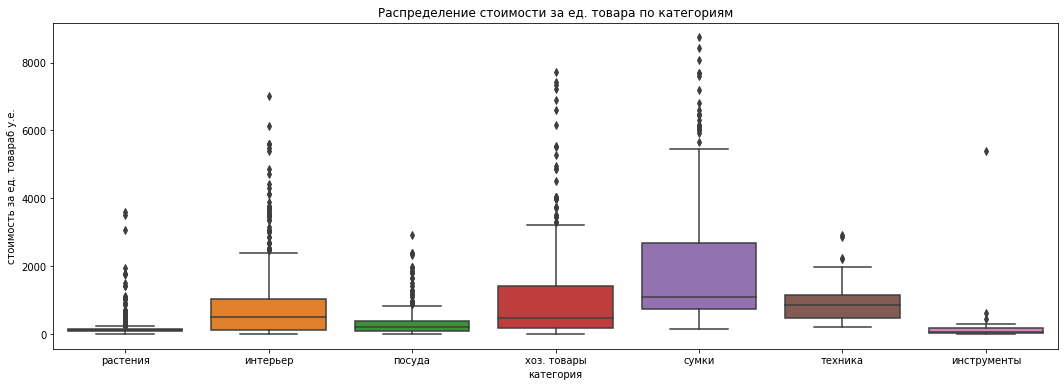

In [48]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.boxplot(y= 'price', x = 'category', data=data)
plt.title("Распределение стоимости за ед. товара по категориям")
plt.xlabel('категория')
plt.ylabel('стоимость за ед. товараб у.е.');

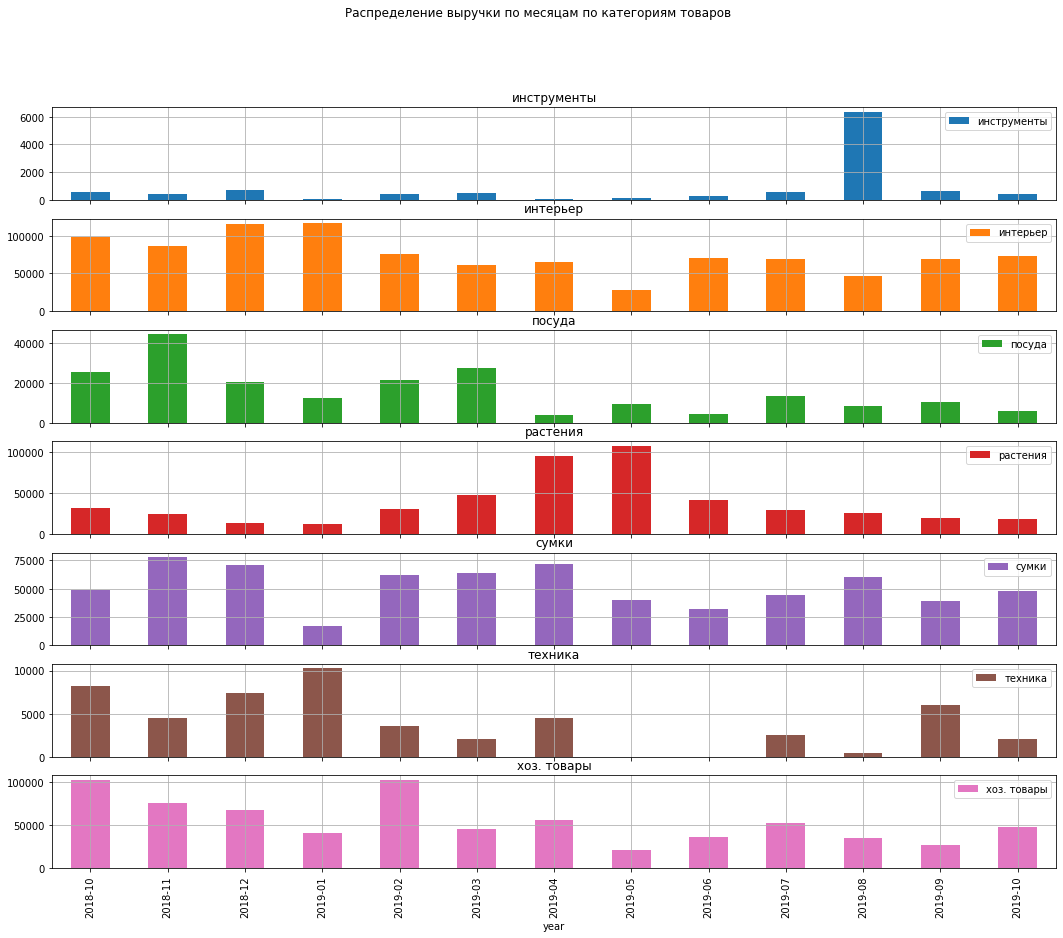

In [49]:
data_category = data.groupby(['year', 'category'])['total_price'].sum().unstack(1)

data_category.plot(kind = 'bar', grid = True, subplots = True, figsize=(18, 14))
plt.suptitle('Распределение выручки по месяцам по категориям товаров');

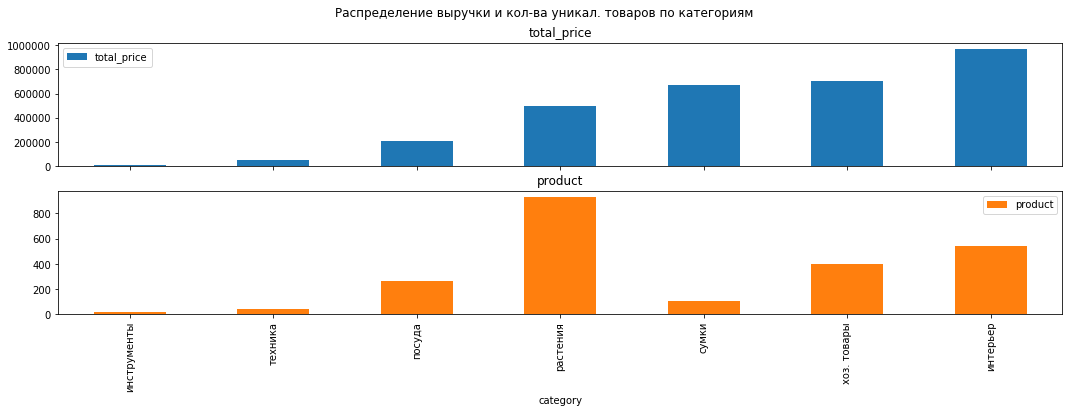

In [50]:
# посмотрим, какая категория приносит больше всего выручки
data.groupby(['category']).agg({'total_price':'sum', 'product':'nunique'}).sort_values(by = 'total_price').plot(kind = 'bar', subplots = True, figsize = (18, 5))
plt.suptitle("Распределение выручки и кол-ва уникал. товаров по категориям");

In [51]:
# посмотрим, какая категория приносит больше всего выручки
#data.groupby(['category'])['total_price'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (18, 4))
#plt.title("Распределение выручки по категориям");

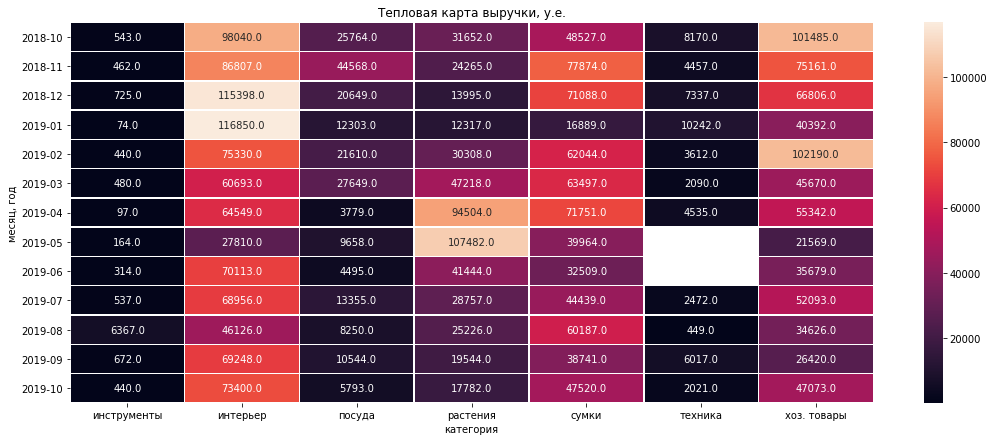

In [52]:
data_total_price = data.pivot_table(index = 'year', columns = 'category', values = 'total_price', aggfunc = 'sum')
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(data_total_price, annot = True, linewidths=.5, fmt = '0')
#ax.set_ylim(7, 0)  
plt.title("Тепловая карта выручки, у.е.")
plt.xlabel('категория')
plt.ylabel('месяц, год')
plt.show()

In [53]:
data_category_total = data_category.sum(axis = 1)
data_category_per = data_category.div(data_category_total, axis = 0)

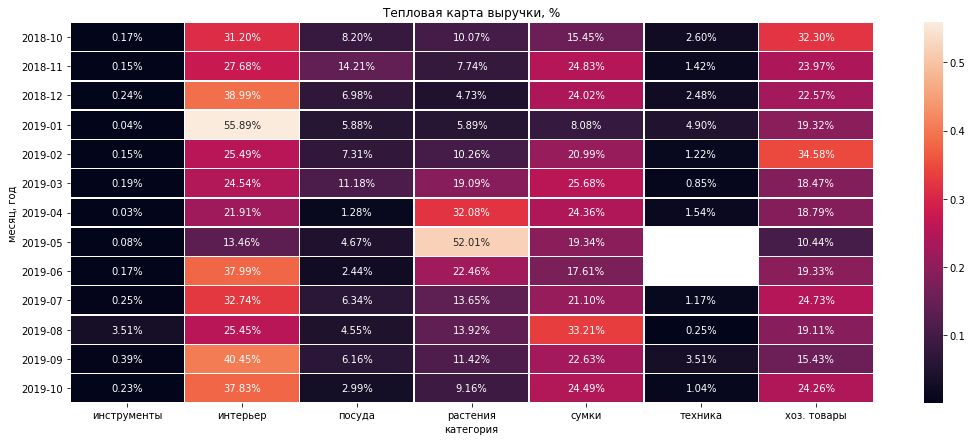

In [54]:
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(data_category_per, annot = True, linewidths=.5, fmt='.2%')
plt.title("Тепловая карта выручки, %")
plt.xlabel('категория')
plt.ylabel('месяц, год')
plt.show()

Однозначно можно сказать, что основные категории - интерьер, сумки и хоз. товары. Растения носят сезонынных характер и выходят в топ в июне месяце - в июне 2019 года товары, проданные в категории растения принесли 52% выручки. Остальные товары - дополнительные. 

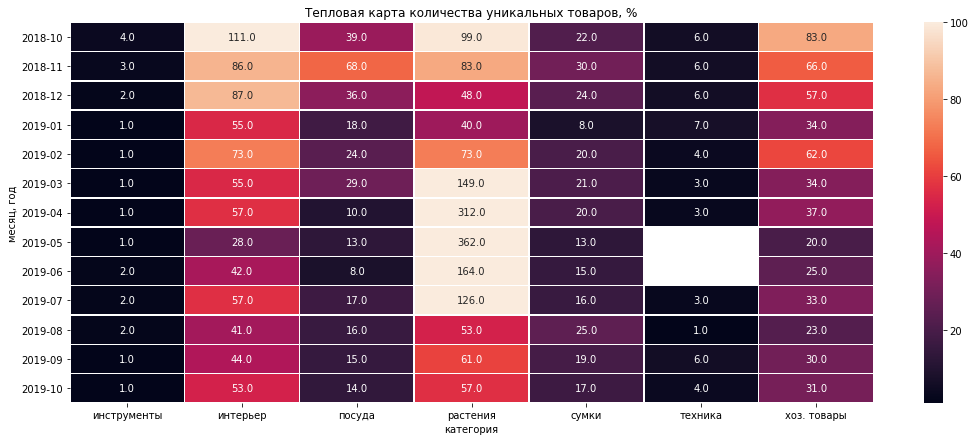

In [55]:
# посмотрим на количество уникальных продаваемых товаров в каждой категории по месяцам
data_category_count = data.groupby(['year', 'category'])['product'].nunique().unstack(1)
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(data_category_count, annot = True, linewidths=.5, fmt='0', vmax = 100)
plt.title("Тепловая карта количества уникальных товаров, %")
plt.xlabel('категория')
plt.ylabel('месяц, год')
plt.show()

Здесь одназначно можно предположение о нехватке ассотримента основного товара: уникальных продаваемых товаров в категориях интерьер и хоз. товары уменьшилось практически в 2 раза в октбяре 2019 посравнению с октябрем 2018.

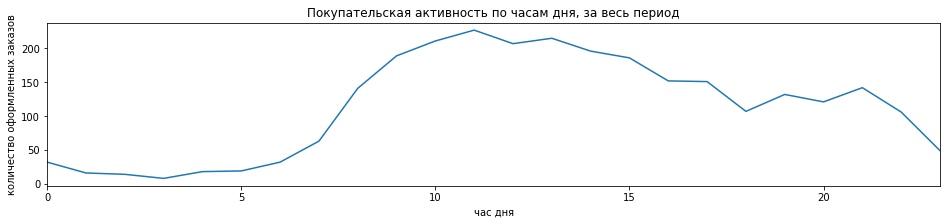

In [56]:
# посмотрим на покупательскую активность по часам 
plt.figure(figsize=(16, 3))
data[['order_id', 'hour']].drop_duplicates().groupby('hour')['order_id'].count().plot()
plt.xlabel("час дня")
plt.ylabel("количество оформленных заказов")
plt.title('Покупательская активность по часам дня, за весь период');

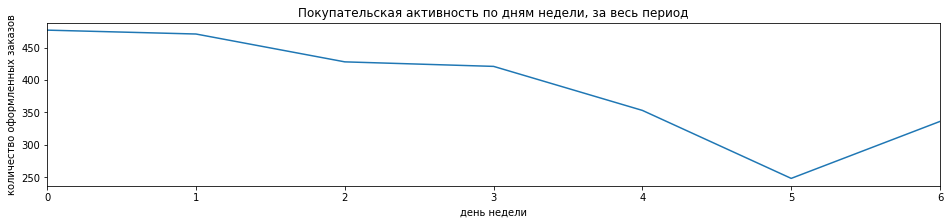

In [57]:
# посмотрим на покупательскую активность по дням недели
plt.figure(figsize=(16, 3))
data[['order_id', 'weekday']].drop_duplicates().groupby('weekday')['order_id'].count().plot()
plt.ylabel("количество оформленных заказов")
plt.xlabel("день недели")
plt.title('Покупательская активность по дням недели, за весь период');

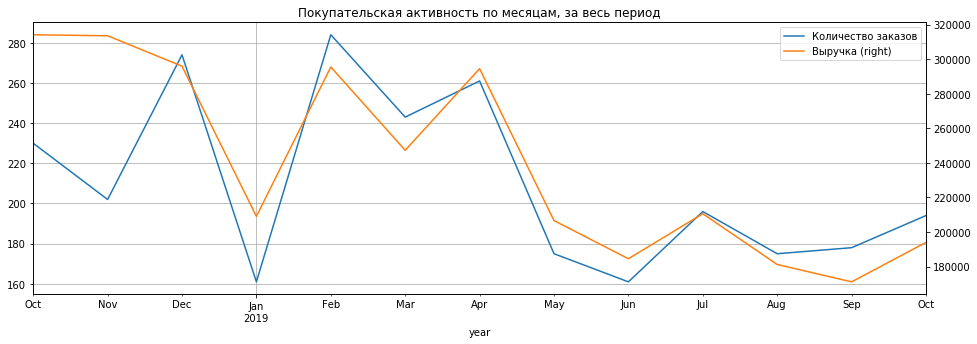

In [58]:
# посмотрим на покупательскую активность по дням недели
plt.figure(figsize=(16, 5))
data[['order_id', 'year']].drop_duplicates().groupby('year')['order_id'].count().plot(label="Количество заказов", legend=True, grid = True)
data[['total_price', 'year']].groupby('year')['total_price'].sum().plot(secondary_y=True, label="Выручка", legend=True, grid = True)
plt.xlabel("месяц-год")
plt.title('Покупательская активность по месяцам, за весь период');

In [59]:
# посмотрим на количество созданных заказов, уникальных пользователей и уникальных покупаемых товаров в месяц
data_orders = data.groupby(['year'])[['order_id', 'customer_id', 'product']].nunique().reset_index()
data_orders = data_orders.rename(columns = {'order_id': 'orders_total', 'customer_id':'total_customers', 'product':'unique_products'})
data_orders['order_per_customer'] = data_orders['orders_total'] / data_orders['total_customers']
data_orders = data_orders.set_index('year')
#data['order_per_customer'] = data['orders_total'] / data['total_customers']

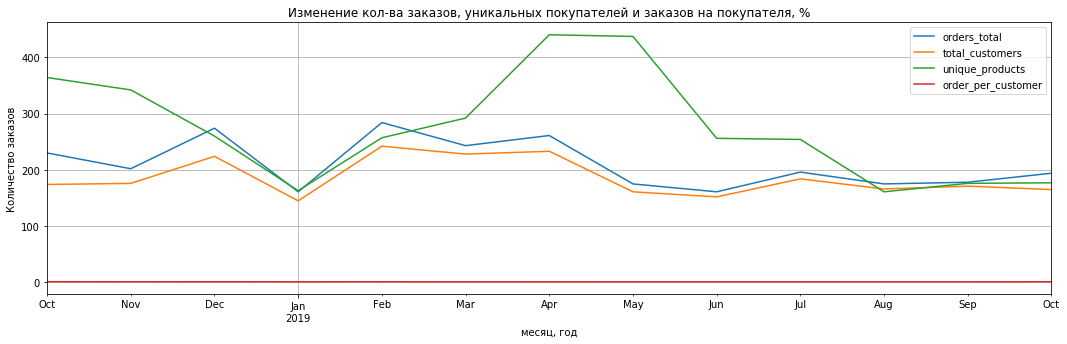

In [60]:
data_orders.plot(figsize = (18, 5), grid = True)
plt.title("Изменение кол-ва заказов, уникальных покупателей и заказов на покупателя, %")
plt.xlabel('месяц, год')
plt.ylabel('Количество заказов')
plt.show()

**ВЫВОД:** 

Товары категории интерье, хоз.товары и сумки можно назвать основным: продажа товаров этих категорий приносит большую долю выручки. Товары категорий растения, посуда, интерьер и техника - дополнительными. Товары категории растения яdно носят сезонных характер: в мае 2018 эта категория принесла 50% выручки. 

Каждый пользователь делает примерно по одному заказу в месяц, больше всего заказов делают в воскресенье и начале недели, а меньше всего в пятницу, а самые активные часы - утро и день, с 8 до 20 дня. Тем не менее тренд отрицательный: количество уникальных товаров снижается, кол-во пользователей снижается, а с ними падает и выручка. 

<a id='step_4'></a>
**Шаг №4. Анализ торгового ассортимента по категориям товаров**

<a id='step_4_1'></a>
**Растения**

In [61]:
# поменяем подкатегории
plants_dict = {'рассада' : ['рассада', 'черенок'], 
               'комнатное растение' : ['кашпо', 'комнатное']}


In [62]:
data_plants = data.query('category == "растения"')

for key, values in plants_dict.items():
    for set in values:
        mask = (data_plants['product'].apply(lambda x: x.find(set)) >= 0)
        if data_plants[mask].shape[0] != 0: 
            data_plants.loc[data_plants[mask].index, 'tag'] = key


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [63]:
#выделим топ-15 продаваемых подкатегорий
plants_top = data_plants.groupby(['tag'])['total_price'].sum().sort_values(ascending = False).head(15)
plants_top.index

Index(['рассада', 'пеларгония', 'комнатное растение', 'роза', 'герань',
       'однолетнее', 'эвкалипт', 'томата', 'петуния', 'спатифиллум',
       'антуриум', 'калибрахоа', 'мединилла', 'циперус', 'бакопа'],
      dtype='object', name='tag')

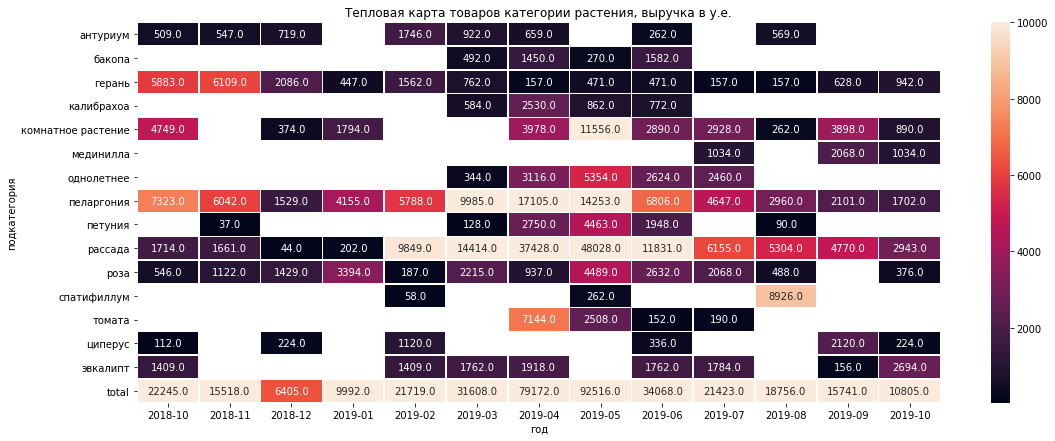

In [64]:
plants_top_price = data_plants.query('tag in @plants_top.index').pivot_table(index = 'tag', columns = 'year', values = 'total_price', aggfunc = 'sum')
plants_top_price.loc['total'] = plants_top_price.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(plants_top_price, annot = True, linewidths=.5, fmt='0', vmax = 10000)
plt.title("Тепловая карта товаров категории растения, выручка в у.е.")
plt.xlabel('год')
plt.ylabel('подкатегория');

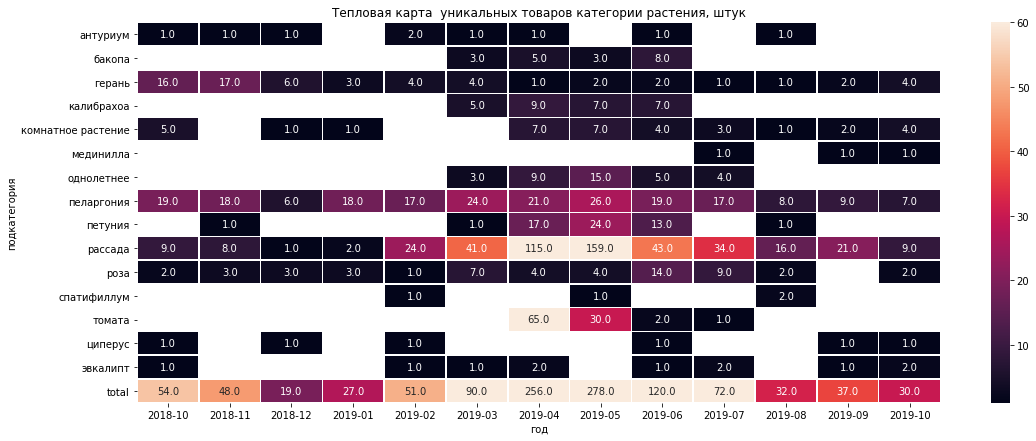

In [65]:
plants_top_unique_prod = data_plants.query('tag in @plants_top.index').pivot_table(index = 'tag', columns = 'year',  values = 'product', aggfunc = 'nunique')
plants_top_unique_prod.loc['total'] = plants_top_unique_prod.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(plants_top_unique_prod, annot = True, linewidths=.5, fmt='0', vmax = 60)
plt.title("Тепловая карта  уникальных товаров категории растения, штук")
plt.xlabel('год')
plt.ylabel('подкатегория');

Сезонность категорие рассада придает продажа рассады, но на удивление, рассада пользуется популярностью не только в летние месяцы, но и осенью: видимо, мода на свежую травку на подоконнике. 
Так же ясно выделяется нехватка ассортимента в категории герань и петунья. Расссмотрим их по-отдельности. 

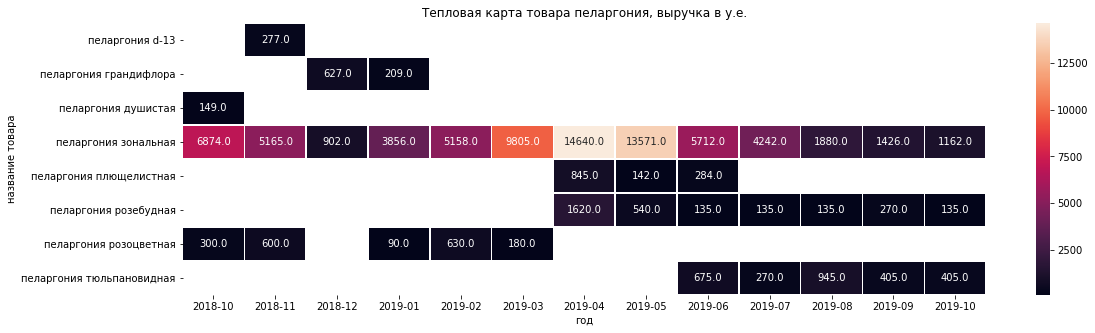

In [66]:
data_pelargonia = data_plants.query('tag == "пеларгония"').pivot_table(index = 'product_name_2w', columns = 'year', values = 'total_price', aggfunc = 'sum')
fig, ax = plt.subplots(figsize = (18, 5))
sns.heatmap(data_pelargonia, annot = True, linewidths=.5, fmt='0')
plt.title("Тепловая карта товара пеларгония, выручка в у.е.")
plt.xlabel('год')
plt.ylabel('название товара');

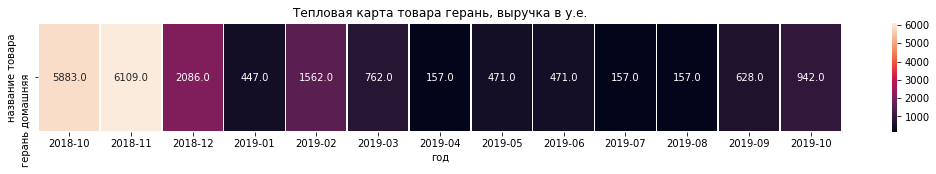

In [67]:
data_geran = data_plants.query('tag == "герань"').pivot_table(index = 'product_name_2w', columns = 'year', values = 'total_price', aggfunc = 'sum')
fig, ax = plt.subplots(figsize = (18, 2))
sns.heatmap(data_geran, annot = True, linewidths=.5, fmt='0')
plt.title("Тепловая карта товара герань, выручка в у.е.")
plt.xlabel('год')
plt.ylabel('название товара');

In [68]:
#data_rassada = data_plants.query('tag == "рассада"').pivot_table(index = 'product_name_2w', columns = 'year', values = 'total_price', aggfunc = 'sum')
#fig, ax = plt.subplots(figsize = (18, 16))
#sns.heatmap(data_rassada, annot = True, linewidths=.5, fmt='0')
#plt.title("Тепловая карта товара рассада выручка в у.е.")
#plt.xlabel('год')
#plt.ylabel('название товара');

Одназначно, необходимо проверить наличие герани домашней и пеларгонии зональной.

<a id='step_4_2'></a>
**Интерьер**

In [69]:
#data_inter = data.query('category == "интерьер"').groupby(['year','tag'])['total_price'].sum().unstack(0).sort_values(by = '2018-10', ascending = False)
#data_inter.loc['total'] = data_inter.sum(axis = 0)
#data_inter

In [70]:
# выделим топ-25 товаров, которые приносят наибольную выручку в категории интерьер

top_inter = data.query('category == "интерьер"').groupby(['tag'])['total_price'].sum().sort_values(ascending = False).head(15)
top_inter.index

Index(['сушилка', 'коврик', 'штора', 'скатерть', 'полки', 'простынь',
       'вешалка', 'одеяло', 'искусственный', 'муляж', 'новогоднее',
       'наматрацник', 'покрывало', 'ведро', 'банка'],
      dtype='object', name='tag')

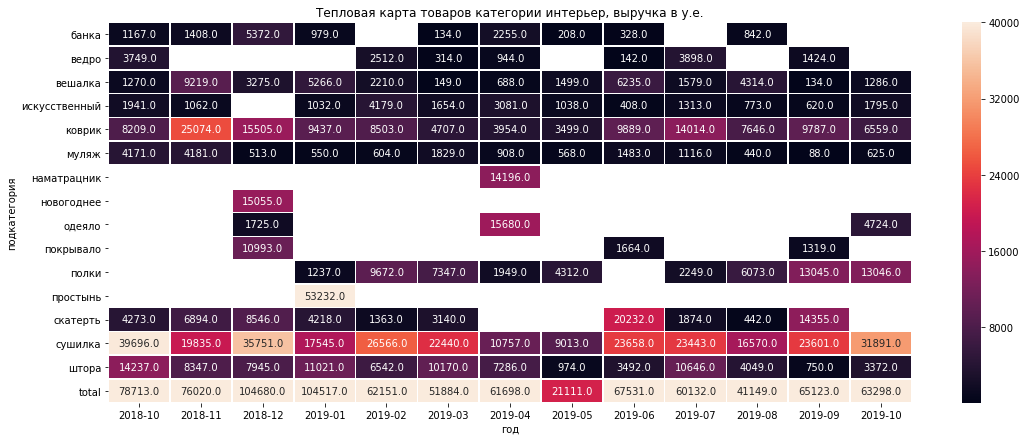

In [71]:
inter_top_price = data.query('tag in @top_inter.index').pivot_table(index = 'tag', columns = 'year', values = 'total_price', aggfunc = 'sum')
inter_top_price.loc['total'] = inter_top_price.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(inter_top_price, annot = True, linewidths=.5, fmt='0', vmax = 40000)
plt.title("Тепловая карта товаров категории интерьер, выручка в у.е.")
plt.xlabel('год')
plt.ylabel('подкатегория');

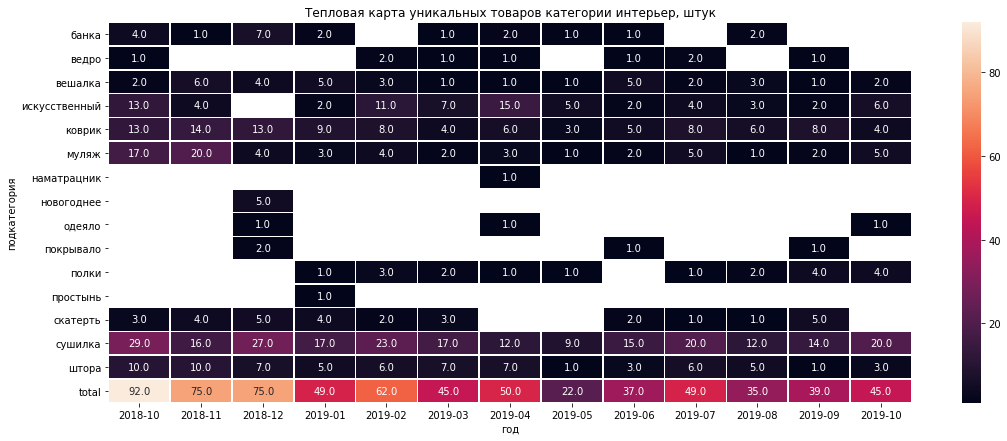

In [72]:
inter_top_unique_prod = data.query('tag in @top_inter.index').pivot_table(index = 'tag', columns = 'year', values = 'product', aggfunc = 'nunique')
inter_top_unique_prod.loc['total'] = inter_top_unique_prod.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(inter_top_unique_prod, annot = True, linewidths=.5, fmt='0')
plt.title("Тепловая карта уникальных товаров категории интерьер, штук")
plt.xlabel('год')
plt.ylabel('подкатегория');

В категории интерьер можно выделить сушилки, шторы, коврики и скатерти как основные категории товаров, которые приносят основную прибыль. В целом, продажи в этой категории стабильны, но рекомендуется проверить наличие ассортимента в категориях коврики, шторы, сушилки, а также наличие новогодний елок и исскуственных товаров и муляжей.

<a id='step_4_3'></a>
**Хоз. товары**

In [73]:
# выделим топ-15 товаров, которые приносят наибольную выручку в категории хоз. товары
top_hoz = data.query('category == "хоз. товары"').groupby(['tag'])['total_price'].sum().sort_values(ascending = False).head(15)
top_hoz.index

Index(['гладильная', 'стремянка', 'чехол', 'урна', 'контейнер', 'корзина',
       'щетка', 'веник', 'швабра', 'стремянки', 'ерш', 'сиденье', 'корыто',
       'штанга', 'рукав'],
      dtype='object', name='tag')

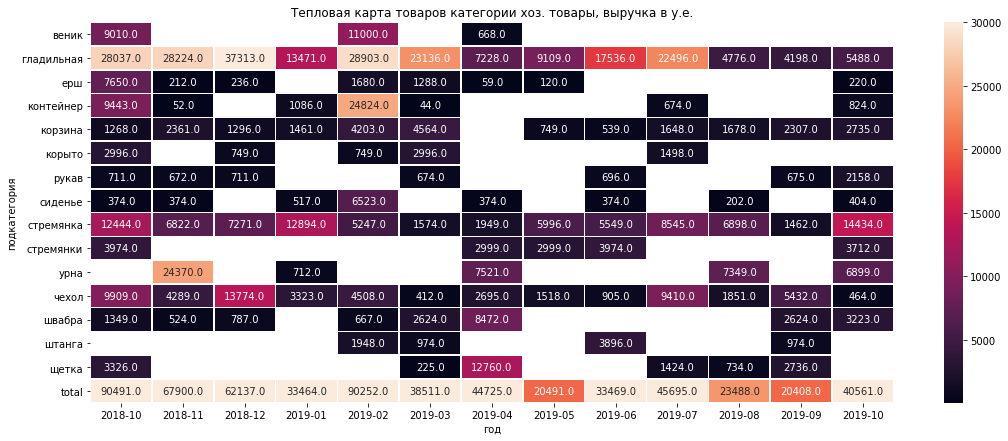

In [74]:
hoz_top_price = data.query('tag in @top_hoz.index').pivot_table(index = 'tag', columns = 'year', values = 'total_price', aggfunc = 'sum')
hoz_top_price.loc['total'] = hoz_top_price.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(hoz_top_price, annot = True, linewidths=.5, fmt='0', vmax = 30000)
plt.title("Тепловая карта товаров категории хоз. товары, выручка в у.е.")
plt.xlabel('год')
plt.ylabel('подкатегория');

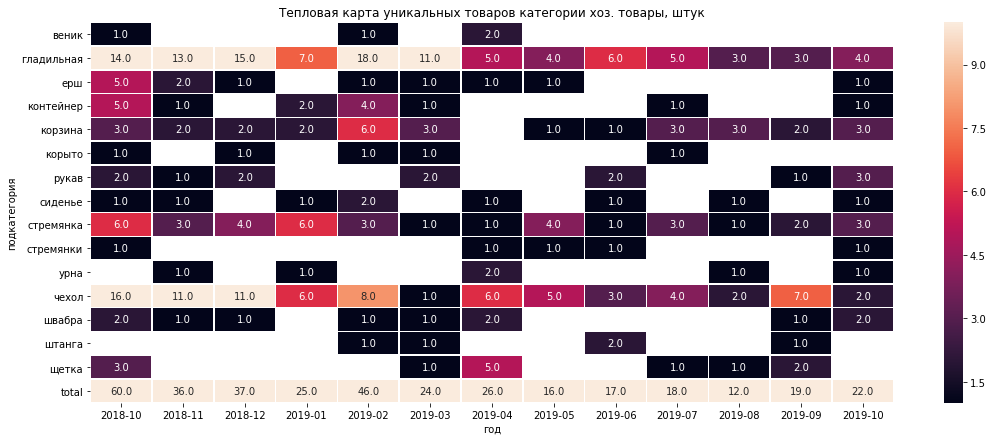

In [75]:
hoz_top_unique_prod = data.query('tag in @top_hoz.index').pivot_table(index = 'tag', columns = 'year', values = 'product', aggfunc = 'nunique')
hoz_top_unique_prod.loc['total'] = hoz_top_unique_prod.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(hoz_top_unique_prod, annot = True, linewidths=.5, fmt='0', vmax = 10)
plt.title("Тепловая карта уникальных товаров категории хоз. товары, штук")
plt.xlabel('год')
plt.ylabel('подкатегория');

В категории хозяйственные товары можно выделить гладильные доски, ершы, контейнеры, корзины, стремянки и чехлы как основные товары, которые приносят наибольшую выручку. Рекомендуется проверить наличие ассортимента в этих категориях. 

<a id='step_4_4'></a>
**Посуда**

In [76]:
# выделим топ-15 товаров, которые приносят наибольную выручку в категории посуда
top_posuda = data.query('category == "посуда"').groupby(['tag'])['total_price'].sum().sort_values(ascending = False).head(15)
top_hoz.index

Index(['гладильная', 'стремянка', 'чехол', 'урна', 'контейнер', 'корзина',
       'щетка', 'веник', 'швабра', 'стремянки', 'ерш', 'сиденье', 'корыто',
       'штанга', 'рукав'],
      dtype='object', name='tag')

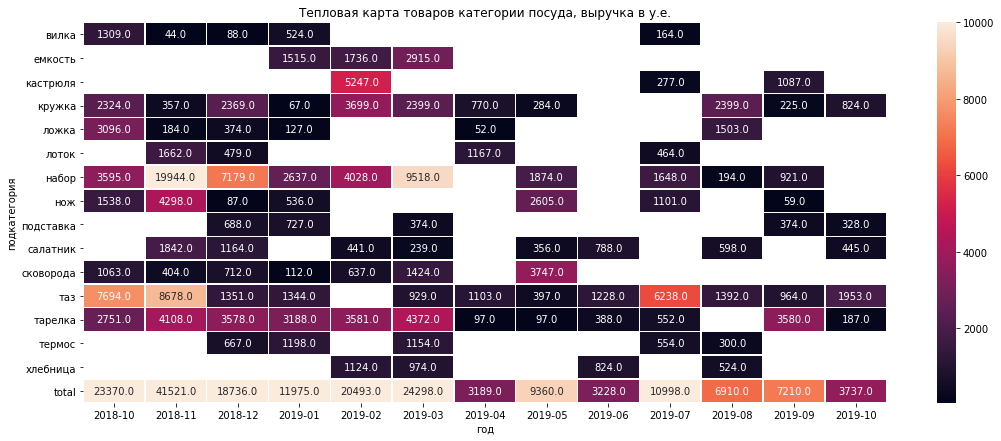

In [77]:
posuda_top_price = data.query('tag in @top_posuda.index').pivot_table(index = 'tag', columns = 'year', values = 'total_price', aggfunc = 'sum')
posuda_top_price.loc['total'] = posuda_top_price.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(posuda_top_price, annot = True, linewidths=.5, fmt='0', vmax = 10000)
plt.title("Тепловая карта товаров категории посуда, выручка в у.е.")
plt.xlabel('год')
plt.ylabel('подкатегория');

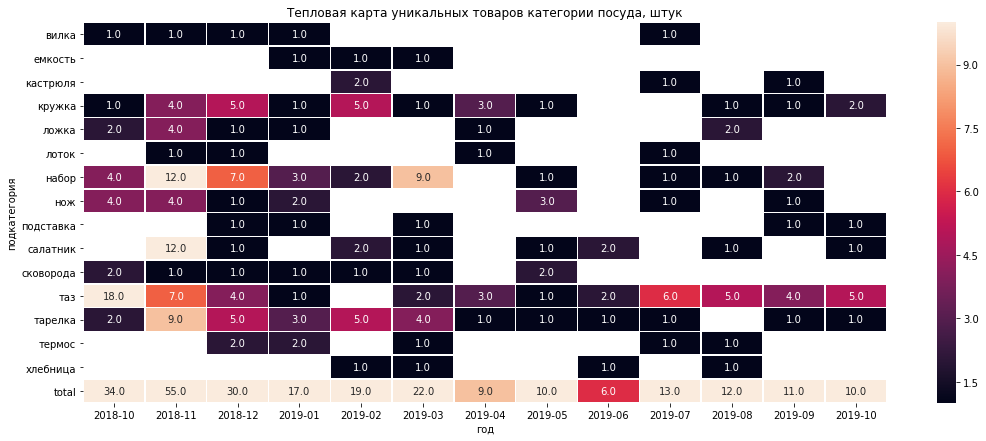

In [78]:
posuda_top_unique_prod = data.query('tag in @top_posuda.index').pivot_table(index = 'tag', columns = 'year', values = 'product', aggfunc = 'nunique')
posuda_top_unique_prod.loc['total'] = posuda_top_unique_prod.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(posuda_top_unique_prod, annot = True, linewidths=.5, fmt='0', vmax = 10)
plt.title("Тепловая карта уникальных товаров категории посуда, штук")
plt.xlabel('год')
plt.ylabel('подкатегория');

Основную выручку делают товары в категориях кастрюли, кружки, наборы, ножи, тазы и тарелки. Рекомендуется проверить наличие ассортимента в этих категориях.

<a id='step_4_5'></a>
**Сумки**

In [79]:
# выделим топ-15 товаров, которые приносят наибольную выручку в категории сумки
top_bags = data.query('category == "сумки"').groupby(['tag'])['total_price'].sum().sort_values(ascending = False).head(15)
top_bags.index

Index(['тележка', 'сумка'], dtype='object', name='tag')

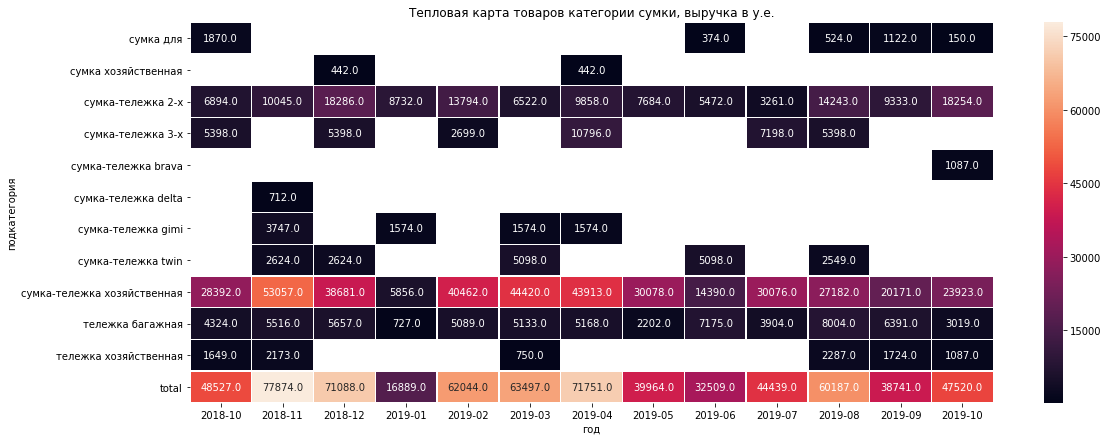

In [80]:
# посмотрим на продажи топ-25 наименований по времени
bag_top_price = data.query('category == "сумки"').pivot_table(index = 'product_name_2w', columns = 'year', values = 'total_price', aggfunc = 'sum')
bag_top_price.loc['total'] = bag_top_price.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(bag_top_price, annot = True, linewidths=.5, fmt='0')
plt.title("Тепловая карта товаров категории сумки, выручка в у.е.")
plt.xlabel('год')
plt.ylabel('подкатегория');

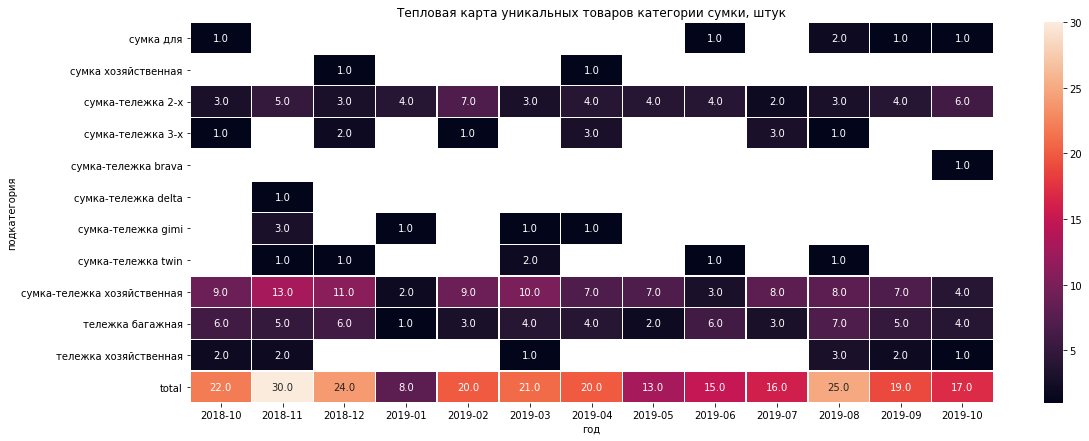

In [81]:
bag_top_unique_prod = data.query('category == "сумки"').pivot_table(index = 'product_name_2w', columns = 'year', values = 'product', aggfunc = 'nunique')
bag_top_unique_prod.loc['total'] = bag_top_unique_prod.sum()
fig, ax = plt.subplots(figsize = (18, 7))
sns.heatmap(bag_top_unique_prod, annot = True, linewidths=.5, fmt='0', vmax = 30)
plt.title("Тепловая карта уникальных товаров категории сумки, штук")
plt.xlabel('год')
plt.ylabel('подкатегория');

Категория сумки является основной, продажи в ней в целом стабильные, но проседают в некоторых месяцах: в январе 2019, и летом: май, июнь, июль. Январь месяц глухой, а вот летом, возможно, не хватало ассортимента. Рекомендуется проверить наличие товара.

<a id='step_5'></a>
**Шаг 5. Проверка гипотез**

In [82]:
# проверим гипотезу, что средняя месячная выручка категорий интерьер и посуда одинаковые
# нулевая гипотеза: средние выручки в месяц равны
# альтернативная гипотеза: средний выручки в месяц не равны

proceeds_month = data.groupby(['year','category'])['total_price'].agg(['sum']).reset_index()

proceeds_inter = proceeds_month.query('category == "интерьер"')['sum']
proceeds_posuda = proceeds_month.query('category == "посуда"')['sum']

print('Средняя выручка в месяц товаров категории интерьер {:.2f} у.е.'.format(proceeds_inter.mean()))
print('Средняя выручка в месяц товаров категории посуда {:.2f} у.е.'.format(proceeds_posuda.mean()))

Средняя выручка в месяц товаров категории интерьер 74870.77 у.е.
Средняя выручка в месяц товаров категории посуда 16032.08 у.е.


In [83]:
alpha = 0.05 # критический уровень статистической значимости
          
results = st.ttest_ind(
    proceeds_inter, 
    proceeds_posuda, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Принимаем альтернативную гипотезу, средняя выручка в месяц отличается")
else:
    print("Оставляем нулевую гипотезу, средняя выручка в месяц не отличается")

p-значение: 6.391422356709064e-07
Принимаем альтернативную гипотезу, средняя выручка в месяц отличается


In [84]:
# проверим гипотезу, что средняя месячная выручка категорий интерьер и хоз. товары одинаковые
# нулевая гипотеза: средние выручки в месяц равны
# альтернативная гипотеза: средний выручки в месяц не равны

proceeds_hoz = proceeds_month.query('category == "хоз. товары"')['sum']

print('Средняя выручка в месяц товаров категории интерьер {:.2f} у.е.'.format(proceeds_inter.mean()))
print('Средняя выручка в месяц товаров категории хоз. товары {:.2f} у.е.'.format(proceeds_hoz.mean()))


Средняя выручка в месяц товаров категории интерьер 74870.77 у.е.
Средняя выручка в месяц товаров категории хоз. товары 54192.77 у.е.


In [85]:
results = st.ttest_ind(
    proceeds_inter, 
    proceeds_hoz, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Принимаем альтернативную гипотезу, средняя выручка в месяц отличается")
else:
    print("Оставляем нулевую гипотезу, средняя выручка в месяц не отличается")

p-значение: 0.049235581605606725
Принимаем альтернативную гипотезу, средняя выручка в месяц отличается


<a id='step_6'></a>
**Шаг 5. Общий вывод**

В данных данные о чеках с разбивкой по товарам за период 01-10-2018 - 31-10-2019. Пустых значений нет, явных повторений нет. Но есть явный баг: номера заказов дублируются с возможной изменением состава корзины или стоимостью товара. Удалили такие заказы, оставив последний по дате создания. 

Каждый пользователь делает примерно по одному заказу в месяц, больше всего заказов делают в воскресенье и начале недели, а меньше всего в пятницу, а самые активные часы - утро и день, с 8 до 20 дня. **Тем не менее тренд отрицательный: количество уникальных товаров снижается, кол-во пользователей снижается, а с ними падает и выручка**.

Товары можно разделить на 7 категорий: интерьер, хоз. товары, сумки, растения, техника, посуда и инструменты. 
Категории интерьер, хоз. товары и сумки являются основными, продажи товаров категории растения носят сезонный характер, в мае 2018 эта категория принесла 50% выручки, категории техника, посуда и инструменты - дополнительные. 

В категории интерьер можно выделить **сушилки, шторы, коврики и скатерти как основные категории товаров**, которые приносят основную прибыль. В целом продажи в этой категории стабильны, но рекомендуется **проверить наличие ассортимента в категориях коврики, шторы, сушилки, а также наличие новогодний елок и искусственных товаров и муляжей**.

В категории хозяйственные товары можно выделить **гладильные доски, ершы, контейнеры, корзины, стремянки и чехлы** как основные товары, которые приносят наибольшую выручку. Рекомендуется проверить наличие ассортимента в этих категориях.

Продажи в категории сумки в целом стабильные, но проседают в нескорых месяцах: в январе 2019, и летом: май, июнь, июль. Январь месяц низкий по продажам, а вот летом, возможно, не хватало ассортимента. Рекомендуется проверить наличие товара.

Сезонность категории растения придает продажа рассады, но на удивление, рассада пользуется популярностью не только в летние месяцы, но и осенью: видимо, мода на свежую травку на подоконнике. Рекомендуется проверить наличие **герани домашней, пеларгонии зональной и рассады зелени**.

Основную выручку делают товары в категории посуда делают продажи **кастрюль, кружек, наборов, ножи, тазы и тарелки**. Рекомендуется проверить наличие ассортимента в этих категориях.

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>

ссылка на презентацию: https://docs.google.com/presentation/d/1z7x-FP2Im1wAb-HnIuI7sauPdKwOS69Im2zfsRdlGLM/edit?usp=sharing
    
    
ссылка на дашборд: https://public.tableau.com/views/Ecommerce-2/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link
    
https://public.tableau.com/app/profile/anna.pysko/viz/Ecommerce-2/Dashboard1
    
</div>